# **JAMPP - Predicción de Probabilidad de Clicks**

# Archivos y librerías

**Los archivos se encuentran alojados en Google Drive, para lo cual se ejecutan los siguientes comandos a fin de importarlos a la notebook**

In [1]:
# # Se listan todos los archivos a importar

archivos_train = ['ctr_15.zip',
                 'ctr_16.zip',
                 'ctr_17.zip',
                 'ctr_18.zip',
                 'ctr_19.zip',
                 'ctr_20.zip',
                 'ctr_21.zip'
                 ]

# archivos_otros = ['ctr_test.zip',
#                   'ctr_test_labeled.zip']

In [2]:
import pandas as pd
from tqdm.notebook import tqdm
import seaborn as sns

# Exploratorio

In [3]:
df = pd.DataFrame()
porcentaje = 0.90
for x in tqdm(archivos_train,leave=False):

    df_i = pd.read_csv('./' + x ,compression='zip', encoding = 'UTF-8')
    n_raw = df_i.shape[0]
    n_porc = int(n_raw*porcentaje)
    
    df = pd.concat([df,df_i.sample(n_porc,random_state=10)], axis=0)
    print (x, n_raw,n_porc,df.shape[0])
  
    del df_i, n_raw, n_porc
      
print('\n','df',df.shape)
# print('df_test', df_test.shape)

ctr_15.zip 1239524 1115571 1115571
ctr_16.zip 1092413 983171 2098742
ctr_17.zip 1093607 984246 3082988
ctr_18.zip 1013581 912222 3995210
ctr_19.zip 1326180 1193562 5188772
ctr_20.zip 1356066 1220459 6409231
ctr_21.zip 1523221 1370898 7780129

 df (7780129, 52)


In [4]:
df.head()

,Label,action_categorical_0,action_categorical_1,action_categorical_2,action_categorical_3,action_categorical_4,action_categorical_5,action_categorical_6,action_categorical_7,action_list_0,...,creative_categorical_7,creative_categorical_8,creative_categorical_9,creative_height,creative_width,device_id,device_id_type,gender,has_video,timezone_offset
824897,1,604d011f,f71d2f9b,9e4f5826,2c66682b,c3ab0db6,79ceee49,59638795,e2538fca,IAB8-9,...,NaN,b6910b48,65dcab89,50.0,320.0,b67c4382,6324b367,m,False,4.0
300782,0,9915ffee,d9eb38d8,c0f33c37,9ebdf82c,6825a9aa,6bc0e29c,59638795,e2538fca,IAB22-2,...,NaN,b6910b48,65dcab89,250.0,300.0,846cc147,6324b367,NaN,False,1.0
804692,0,11b7af3d,ac0f362d,2f2b9920,cb80abab,79ab88b6,6bc0e29c,59638795,31b31f57,IAB22,...,NaN,b6910b48,43c867fd,480.0,320.0,17adf0a1,6324b367,NaN,False,1.0
1047296,0,9915ffee,dc24b79b,7c0ac8b2,7ce4e1a3,c96ff6e9,6bc0e29c,59638795,e2538fca,IAB22-2,...,NaN,b6910b48,65dcab89,50.0,320.0,4cd6a17e,c1d12c8e,m,False,1.0
308682,0,c2e4f717,e709bbc0,eafe914f,e7329a92,7b0ab77d,6bc0e29c,59638795,e2538fca,IAB20-6,...,NaN,b6910b48,65dcab89,50.0,320.0,5dbec82c,6324b367,m,False,1.0


In [5]:
df.shape

(7780129, 52)

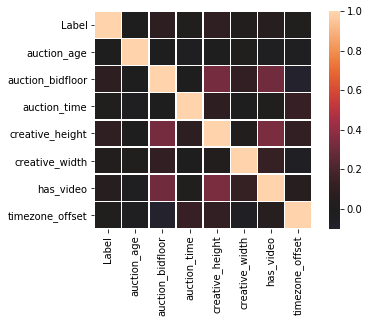

In [6]:
corr=df.corr()
sns.heatmap(corr,
            center=0,
            square=True,
            linewidths=.5,
            #cbar_kws={"shrink": .5}
           )

**Resumen de campos con NaNs**

In [7]:
def resumen_campos(df):
  dict_campos={}
  for col in tqdm(list(df.columns),leave=False):
    unicos=len(df[col].unique())
    nans=sum(df[col].isna())
    tipo=df[col].dtype
    el= (df.loc[~df[col].isna(),col].head(1)).values
    dict_campos[col]={'Valores Unicos': unicos,
                      'NaNs':           nans,
                      'Tipo':           tipo,
                      'Elemento':       el}
  return pd.DataFrame.from_dict(dict_campos,orient='index')
    
resumen_campos(df)
del df

In [8]:
def calcular_estadisticos():
  lst_numericas =['auction_age','auction_bidfloor','auction_time','creative_height','creative_width','timezone_offset']
  
  df = pd.DataFrame()
  porcentaje = 0.90
  ans_dict={}
  for x in tqdm(archivos_train,leave=False):
    if x == 'ctr_test_labeled.zip':
      df_i = pd.read_csv('./' + x ,usecols=lst_numericas)
      n_raw = df_i.shape[0]
      n_porc = int(n_raw*porcentaje)

      df_test = df_i.sample(n_porc,random_state=10)
      ans_dict[x] = {'n_raw':n_raw,
                     'n_porc':n_porc,
                     'len':df.shape[0]}

    else:  
      df_i = pd.read_csv('./' + x ,usecols=lst_numericas)
      n_raw = df_i.shape[0]
      n_porc = int(n_raw*porcentaje)

      df = pd.concat([df,df_i.sample(n_porc,random_state=10)], axis=0)
      ans_dict[x] = {'n_raw':n_raw,
                     'n_porc':n_porc,
                     'len':df.shape[0]}

    del df_i, n_raw, n_porc

  print('\n','df',df.shape)
  # print('df_test', df_test.shape)

  df_estadisticas=df.describe().loc[['mean','std'],:]
  df_estadisticas.to_csv('df_estadisticas.csv')
  return pd.DataFrame.from_dict(ans_dict,orient='index')
#   files.download('df_estadisticas.csv')
  
calcular_estadisticos()


 df (7780129, 6)


,n_raw,n_porc,len
ctr_15.zip,1239524,1115571,1115571
ctr_16.zip,1092413,983171,2098742
ctr_17.zip,1093607,984246,3082988
ctr_18.zip,1013581,912222,3995210
ctr_19.zip,1326180,1193562,5188772
ctr_20.zip,1356066,1220459,6409231
ctr_21.zip,1523221,1370898,7780129


# SGD

## Librería y comentarios iniciales

In [9]:
import shelve
import operator

# import multiprocessing as mp
import threading as mp
import numpy as np
import pandas as pd

from collections import Counter
from functools import reduce
from itertools import count, product as iproduct

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_extraction import FeatureHasher
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss, r2_score

from sklearn.metrics import classification_report, recall_score, precision_score, roc_auc_score
from sklearn.utils import resample
from tqdm import tqdm
# from tqdm.notebook import tqdm
import pickle
import random

**Addenda et corrigenda**

1. Los minibatches se leen directamente del archivo en lugar de cargar el archivo en memoria y luego obtener los minibatches del dataframe. De esta forma evitamos crear un dataframe muy grande (peor, uno por job). En realidad, tampoco es conveniente leer cada minibatch desde el archivo, por lo que leemos varios al mismo tiempo (ver parámetro de configuración `n_batches`). 

2. Al tener todo el código en una notebook resulta más fácil serializar ("picklear") y deserializar instancias de las clases `Extractor` y `Vectorizer`, por lo que estoy guardando en el shelve de salida cada pipeline entero en lugar de únicamente su parametrización. De esta forma no necesitan refitearlo si lo van a usar después.

3. Soporta múltiples archivos de entrada.

4. El código de borrado inicial de la base de salida debería soportar ahora otras implementaciones de shelve (además de gdbm).

## Configuración

* `in_paths` es la lista de archivos de entrada.

* `out_path` es el shelve donde se guardan los scores y pipelines resultantes del fit.

* `n_jobs` es el número de procesos a correr en paralelo.

* `use_r2` debe ser `True` para usar score $R^2$ o `False` para $-logloss$.

* `batch_size` es el tamaño de cada minibatch.

* `n_batches` es la cantidad de minibatches que se leen al mismo tiempo desde el archivo de entrada.

* `drop_scores` es el porcentaje de scores de minibatches iniciales a descartar. Con el resto se calcula el score medio.

* `grid` es una lista de diccionarios cada uno de los cuales tiene tres entradas (`extractor`, `vectorizer`, `classifier`) cuyos valores son, a su vez, diccionarios indicando parámetros para la etapa correspondiente del pipeline.

In [10]:
in_paths = [f for f in archivos_train]

balance_labels = False   #Se puede cambiar para elegir entre balancear la data (0 y 1) o hacer un DownSample

porcentaje = 0.25

out_path = 'models.db'

n_jobs = 4

use_r2 = True

batch_size = 20000

n_batches = 20

drop_scores = 0.7

filename = 'finalized_'

df_estadisticas = pd.read_csv('df_estadisticas.csv')   #mean fila 0, std fila 1


lst_listas         =['action_list_1','action_list_2','auction_list_0']
lst_numericas      =['auction_age','auction_bidfloor','auction_time','creative_height','creative_width','timezone_offset']
lst_columnas       =list(pd.read_csv(in_paths[0],nrows=5).columns)[1:]

features_01   = lst_columnas[:15]
features_02   = ['auction_age','creative_height', 'creative_width', 'device_id', 'device_id_type', 'gender', 'has_video','timezone_offset']
features_03   = ['device_id', 'device_id_type', 'has_video']
features      = list(set(features_01)- set(lst_listas))

grid = [dict(extractor=dict(features=features),
             vectorizer=dict(n_features=n_features, degree=degree),
             classifier=dict(loss='log', max_iter=1000, tol=1e-3,
                             l1_ratio=l1_ratio, alpha=alpha))
        for features in [features]
        for n_features in [2**20]   #[2**20, 2**21, 2**22]
        for degree in [1]
        for l1_ratio in [0.5]
        for alpha in [0.0001]]  #[0.0001, 0.001, 0.01, 0.1]



#         for features in [features]
#         for n_features in [2**20]   #[2**20, 2**21, 2**22]
#         for degree in [1, 2]
#         for l1_ratio in [0.15, 0.5, 0.85]
#         for alpha in [0.0001, 0.001, 0.01, 0.1]]  #[0.0001, 0.001, 0.01, 0.1]

In [11]:
def balancear_data(feat=features):

  df = pd.DataFrame()
#   porcentaje = p
  for x in archivos_train:
      df_i = pd.read_csv('./' + x ,usecols=['Label'] + feat)

      # Separate majority and minority classes
      df_majority = df_i[df_i['Label']==0]
      len_majority= len(df_majority)
      df_minority = df_i[df_i['Label']==1]
      len_minority= len(df_minority)
 
      # Downsample majority class
      df_majority_downsampled = resample(df_majority, 
                                       replace=False,              # sample without replacement
                                       n_samples=len_minority,     # to match minority class
                                       random_state=10)            # reproducible results
 
      # Combine minority class with downsampled majority class
      df_i = resample(pd.concat([df_majority_downsampled, df_minority]), 
                      replace=False,               # sample with replacement
                      n_samples=len_minority*2,    # to match majority class
                      random_state=10)             # reproducible results
      
      df = pd.concat([df, df_i])
      print(x,len_majority,len_minority,df.shape)

  print('\n','df',df.shape)
  print('\n',df['Label'].value_counts())
  # print('df_test', df_test.shape)

  df.to_csv('df_reducido.csv')
#   files.download('df_estadisticas.csv')


def reducir_data(feat=features, p=porcentaje):

  df = pd.DataFrame()
  porcentaje = p
  for x in archivos_train:
      df_i = pd.read_csv('./' + x ,usecols=['Label'] + feat)
      n_raw = df_i.shape[0]
      n_porc = int(n_raw*p)
      
      if p<1.0:
        # Downsample
        df_i = df_i.sample(n_porc,random_state=10)
      df = pd.concat([df, df_i])
      print (x, n_raw,n_porc,df.shape[0])
      
    
  print('\n','df',df.shape)
  print('\n',df['Label'].value_counts())
  # print('df_test', df_test.shape)

  df.to_csv('df_reducido.csv')
#   files.download('df_estadisticas.csv')

if balance_labels:
  balancear_data(feat=features)
  in_paths=['df_reducido.csv']
else:
  reducir_data(feat=features, p=porcentaje)
  in_paths=['df_reducido.csv']
  

ctr_15.zip 1239524 309881 309881
ctr_16.zip 1092413 273103 582984
ctr_17.zip 1093607 273401 856385
ctr_18.zip 1013581 253395 1109780
ctr_19.zip 1326180 331545 1441325
ctr_20.zip 1356066 339016 1780341
ctr_21.zip 1523221 380805 2161146

 df (2161146, 14)

 0    2134790
1      26356
Name: Label, dtype: int64


In [12]:
in_paths

['df_reducido.csv']

In [13]:
pd.read_csv('df_reducido.csv',nrows=10).head()

,Unnamed: 0,Label,action_categorical_0,action_categorical_1,action_categorical_2,action_categorical_3,action_categorical_4,action_categorical_5,action_categorical_6,action_categorical_7,action_list_0,auction_age,auction_bidfloor,auction_boolean_0,auction_boolean_1
0,824897,1,604d011f,f71d2f9b,9e4f5826,2c66682b,c3ab0db6,79ceee49,59638795,e2538fca,IAB8-9,29.0,0.070000,47980dda,79ceee49
1,300782,0,9915ffee,d9eb38d8,c0f33c37,9ebdf82c,6825a9aa,6bc0e29c,59638795,e2538fca,IAB22-2,NaN,0.060000,47980dda,79ceee49
2,804692,0,11b7af3d,ac0f362d,2f2b9920,cb80abab,79ab88b6,6bc0e29c,59638795,31b31f57,IAB22,NaN,1.700680,47980dda,79ceee49
3,1047296,0,9915ffee,dc24b79b,7c0ac8b2,7ce4e1a3,c96ff6e9,6bc0e29c,59638795,e2538fca,IAB22-2,21.0,0.617284,47980dda,79ceee49
4,308682,0,c2e4f717,e709bbc0,eafe914f,e7329a92,7b0ab77d,6bc0e29c,59638795,e2538fca,IAB20-6,28.0,0.432099,47980dda,79ceee49


In [14]:
len(features)

13

In [15]:
len(grid)

1

In [16]:
df_estadisticas

,Unnamed: 0,auction_age,auction_bidfloor,auction_time,creative_height,creative_width,timezone_offset
0,mean,31.088194,0.517427,1.516300e+09,132.091622,319.963195,1.807443
1,std,9.960179,0.995130,1.786460e+05,127.307138,45.636699,1.888269


## Código principal

Levanta varios procesos/jobs cada uno de los cuales corre la función `job` iterando sobre una parte de la grilla y fiteando un modelo por cada parametrización.

Para ejecutarlo, correr la función `fit()` desde otra celda.

Para inspeccionar los `n` mejores resultados, correr la función `results(n)` desde otra celda. Ojo que si `n` es grande se van a cargar muchos pipeline a la vez en memoria!

In [17]:
class Extractor(FunctionTransformer):

    def __init__(self, features):
        self.features = features
        super().__init__(self._extract, validate=False)

    def _extract(self, X):
        A = pd.DataFrame()
        B = pd.DataFrame()
        c_nulls = []
        
        for col in list(X.columns):
          if col in lst_numericas:
            A[col+'_null']=X.loc[:,col].isna()
            media  = df_estadisticas.loc[0,col]
            desvio = df_estadisticas.loc[1,col]
            A[col] = ( X.loc[:,col] - media )  /  desvio
#             A[col] = X.loc[:,col].fillna(X[col].mean())   #X[col].mean()
            A[col] = X.loc[:,col].fillna(0)   #X[col].mean()
            c_nulls += [col+'_null']
          else:
            B[col] = X[col].fillna('N/A')
        X = pd.concat([A, B], axis=1)
        
        cols_ret = list(X.columns) + c_nulls
        return X.loc[:].to_dict('records')
#         return X.loc[:, self.features].to_dict('records')


class Vectorizer(FeatureHasher):

    def __init__(self, degree=2, n_features=2**20,
                 num_types=[float, np.float64]):
        self.degree = degree
        self.num_types = num_types
        super().__init__(n_features=n_features)

    def transform(self, X):
        return super().transform(map(self._encode, X))

    def _encode(self, dic):
        dic = {k if type(v) in self.num_types else f'{k}={v}':
               float(v) if type(v) in self.num_types else 1
               for k, v in dic.items()}
        dic_keys = list(dic.keys())
        for deg in range(2, self.degree + 1):
            for term_keys in iproduct(dic_keys, repeat=deg):
                term_names, term_facts = [], []
                for k, n in Counter(term_keys).items():
                    v = dic[k]
                    if type(v) is int and n > 1:
                        break
                    term_names.append(k if n == 1 else f'{k}^{n}')
                    term_facts.append(v**n)
                else:  # No dummy feature was included more than once
                    dic['*'.join(sorted(term_names))] = product(term_facts)
        return dic

# def lineas(in_paths):
#   global dict_lineas
#   dict_lineas = {}
#   for f in in_paths:
#     dict_lineas[f] = len(pd.read_csv(f))
#   return
    

def product(iterable, start=1):
    return reduce(operator.mul, iterable, start)


def split(seq, n):
    m, k = divmod(len(seq), n)
    i = 0
    for _ in range(n):
        j = i + m + (1 if k > 0 else 0)
        yield seq[i:j]
        i = j
        k -= 1


def job(n_job):
    for i, params in enumerate(list(split(grid, n_jobs))[n_job]):
        extractor = Extractor(**params['extractor'])
        vectorizer = Vectorizer(**params['vectorizer'])
        classifier = SGDClassifier(**params['classifier'])
        scores = []

        for in_path in in_paths:
            
#             num_lines = dict_lineas[in_path] # Count the lines
#             size = int(num_lines * 0.001) # Sample size - in this case ~10%
#             skip_idx = random.sample(range(1, num_lines),
#                                      num_lines - size,
#                                      random_state=10) # The row indices to skip - make sure 0 is not included to keep the header!            

            for j in count(0, batch_size * n_batches):
                batches = pd.read_csv(in_path,
                                      nrows= batch_size * n_batches,
                                      skiprows= range(1, j + 1))               #Aca se podria hacer un skip rows de nos de filas random
                if len(batches) == 0:
                    break
                for batch in tqdm(split(batches, n_batches)):
                                  
                    X = batch.drop('Label',axis=1)
                    X = extractor.transform(batch)
                    X = vectorizer.transform(X)
                    y = batch.loc[:, 'Label']
                    if j > 0:
                        y_ = classifier.predict_proba(X)
                        if use_r2:
                            scores.append(r2_score(y, y_[:, 1]))
#                             scores.append(precision_score(y, classifier.predict(X)))
                        else:
                            scores.append(-log_loss(y, y_))
                    classifier.partial_fit(X, y, classes=[0, 1])
            key = f'{n_job}-{i}'

        pipe = Pipeline([('extractor', extractor),
                         ('vectorizer', vectorizer),
                         ('classifier', classifier)])
        score = np.mean(scores[int(drop_scores * len(scores)):])
        with lock:
            with shelve.open(out_path) as out:
                out[key] = pipe
                scores = out['scores']
                scores[key] = score
                out['scores'] = scores
        print(f'Fitted {key} with score {score} and params {params}\n\n')
        
        if len(scores)==0:
            pickle.dump(extractor, open(filename+'extractor.sav', 'wb'))
            pickle.dump(vectorizer, open(filename+'vectorizer.sav', 'wb'))
            pickle.dump(classifier, open(filename+'classifier.sav', 'wb'))
        elif scores[key] >= results(1)[0][0]:   #Se guarda el modelo entrenado
            pickle.dump(extractor, open(filename+'extractor.sav', 'wb'))
            pickle.dump(vectorizer, open(filename+'vectorizer.sav', 'wb'))
            pickle.dump(classifier, open(filename+'classifier.sav', 'wb'))
#             
#             files.download(filename+'extractor.sav') # then browse, select the files. It's then uploaded
#             files.download(filename+'vectorizer.sav')
#             files.download(filename+'classifier.sav')

def fit():
    print(f'Fitting grid of size {len(grid)}\n\n')
#     lineas(in_paths)
    with shelve.open(out_path, 'n') as out:  # Recrea la base
        out['scores'] = {}
    if n_jobs > 1:
        procs = []
        for n_job in range(n_jobs):
            proc = mp.Thread(target=job, args=[n_job])
#             proc = mp.Process(target=job, args=[n_job])
            proc.start()
            procs.append(proc)
        for proc in procs:
            proc.join()
    else:
        fit(0)
    
    # save the model to disk



def results(n=5):
    with lock:
        with shelve.open(out_path) as out:
            rank = sorted(((s, k) for k, s in out['scores'].items()),
                          reverse=True)
            return [(s, out[k]) for s, k in rank[:n]]


lock = mp.Lock()

## Fit y pickle

In [18]:
# Recordar que esta función queda corriendo en background
fit()

Fitting grid of size 1




20it [00:13,  1.43it/s]
20it [00:13,  1.46it/s]
20it [00:13,  1.46it/s]
20it [00:13,  1.44it/s]
20it [00:14,  1.38it/s]
20it [00:06,  3.17it/s]


Fitted 0-0 with score 0.9985139558506154 and params {'extractor': {'features': ['auction_boolean_0', 'action_categorical_0', 'action_categorical_2', 'auction_age', 'action_categorical_1', 'auction_bidfloor', 'action_categorical_4', 'action_categorical_5', 'action_categorical_7', 'action_categorical_6', 'auction_boolean_1', 'action_list_0', 'action_categorical_3']}, 'vectorizer': {'n_features': 1048576, 'degree': 1}, 'classifier': {'loss': 'log', 'max_iter': 1000, 'tol': 0.001, 'l1_ratio': 0.5, 'alpha': 0.0001}}




In [31]:
# Ojo que si n es grande se van a cargar
# muchos pipeline a la vez en memoria!
results(3)[0][0]

0.9985139558506154

In [32]:
# files.download(filename+'extractor.sav') # then browse, select the files. It's then uploaded
# files.download(filename+'vectorizer.sav')
# files.download(filename+'classifier.sav')

## Resultados

In [33]:
archivos_pipe=['finalized_extractor.sav',
               'finalized_vectorizer.sav',
               'finalized_classifier.sav']

In [34]:
# load the model from disk
extractor  = pickle.load(open(filename+'extractor.sav', 'rb'))
vectorizer = pickle.load(open(filename+'vectorizer.sav', 'rb'))
classifier = pickle.load(open(filename+'classifier.sav', 'rb'))

In [35]:
df_test = pd.read_csv('ctr_test_labeled.zip',usecols=['Label'] + features)
# df_test = pd.read_csv('df_reducido.csv',usecols=['Label'] + features)
print('ctr_test_labeled.zip ',df_test.shape)
porcentaje = 1.0
if porcentaje<1.00:
  n_raw = df_test.shape[0]
  n_porc = int(n_raw*porcentaje)
  df_test = df_test.sample(n_porc,random_state=10)

ctr_test_labeled.zip  (1139639, 14)


In [36]:
X_test    = df_test.drop('Label',axis=1)
X_test    = extractor.transform(X_test)
X_test    = vectorizer.transform(X_test)
y_test    = df_test.loc[:, 'Label']

y_test_   = classifier.predict_proba(X_test)
y_pred    = classifier.predict(X_test)
result    = r2_score(y_test, y_test_[:, 1])

print(result)

-0.9708854903403912


In [37]:
a=y_test_[y_test==1,1]
print('mean y_proba(Label=1) = ',a.mean(),'\n')
print('min y_proba(Label=1) = ',a.min(),'\n')
print('max y_proba(Label=1) = ',a.max(),'\n')

list(zip(y_test[y_test==1][:10], y_test_[y_test==1,1][:10]))

mean y_proba(Label=1) =  0.16096477744384075 

min y_proba(Label=1) =  0.07274791641903784 

max y_proba(Label=1) =  0.9989162216027396 



[(1, 0.08983369910909131),
 (1, 0.19017312229409788),
 (1, 0.16986332754179778),
 (1, 0.17107989506485355),
 (1, 0.22858812893732458),
 (1, 0.1135693800336867),
 (1, 0.16210406327421437),
 (1, 0.16210406327421437),
 (1, 0.22858812893732458),
 (1, 0.1385977454629209)]

In [38]:
a=y_test_[y_test==0,1]
print('mean y_proba(Label=0) = ',a.mean(),'\n')
print('min y_proba(Label=0) = ',a.min(),'\n')
print('max y_proba(Label=0) = ',a.max(),'\n')

list(zip(y_test[y_test==0][:10], y_test_[y_test==0,1][:10]))

mean y_proba(Label=0) =  0.13653139306541437 

min y_proba(Label=0) =  0.0031151051456722407 

max y_proba(Label=0) =  0.9938041277464578 



[(0, 0.13926272020458863),
 (0, 0.12207583418166619),
 (0, 0.12321971456513517),
 (0, 0.09731172373905196),
 (0, 0.16926778987905358),
 (0, 0.1363991748267903),
 (0, 0.16210406327421437),
 (0, 0.17107989506485355),
 (0, 0.16208392752423229),
 (0, 0.10192747664664933)]

In [39]:
precision_score(y_test, y_pred)

0.11141304347826086

In [40]:
print(classification_report(y_test, y_pred,digits=5))

              precision    recall  f1-score   support

           0    0.98413   0.99971   0.99186   1121523
           1    0.11141   0.00226   0.00444     18116

    accuracy                        0.98385   1139639
   macro avg    0.54777   0.50099   0.49815   1139639
weighted avg    0.97026   0.98385   0.97616   1139639



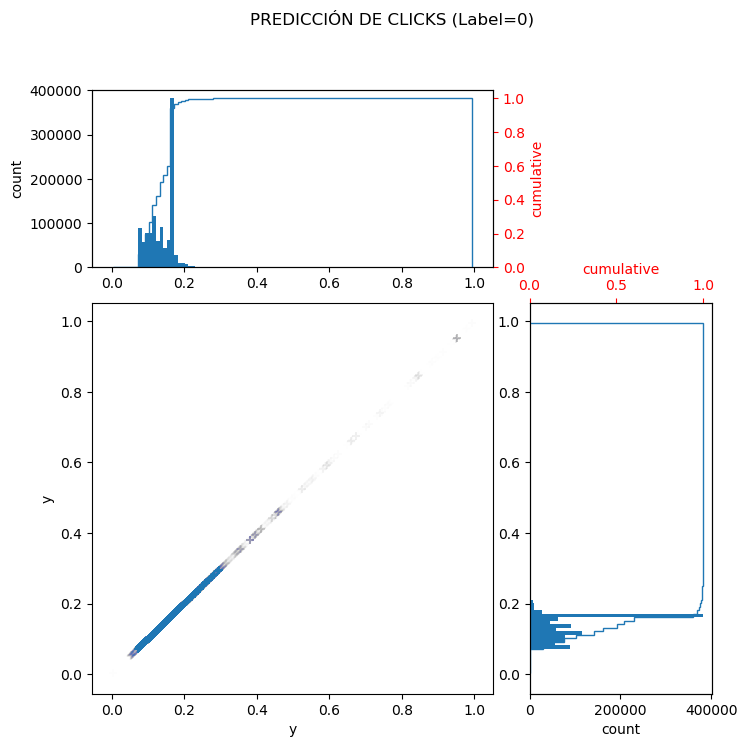

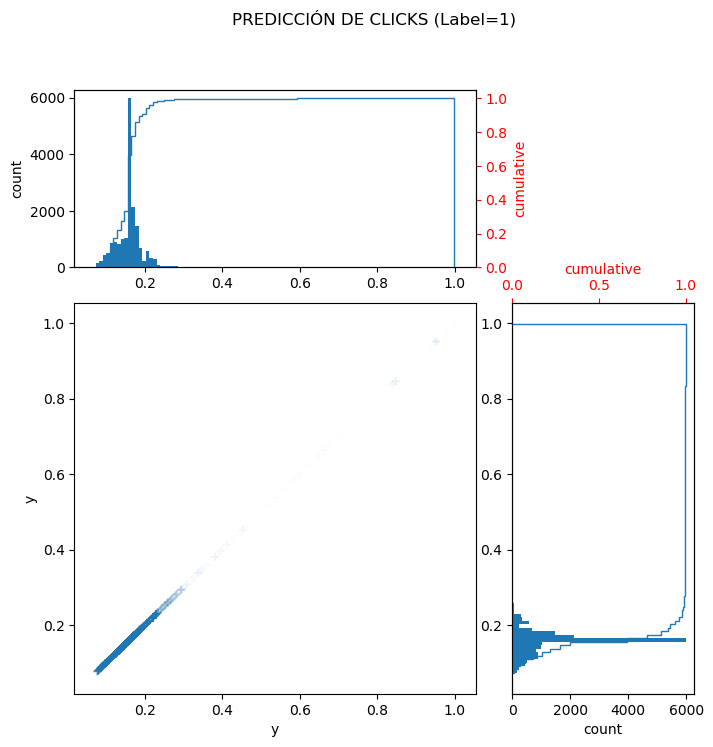

In [41]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
alpha=[0.005,0.01]

for x in [0,1]:
  xpl = y_test_[y_test==x,1]
  ypl = y_test_[y_test==x,1]

  fig = plt.figure(figsize=(8,8),dpi=100)
  plt.suptitle('PREDICCIÓN DE CLICKS (Label='+str(x)+')')
  gs = gridspec.GridSpec(3, 3)
  ax_main = plt.subplot(gs[1:3, :2])
  ax_xDist = plt.subplot(gs[0, :2],sharex=ax_main)
  ax_yDist = plt.subplot(gs[1:3, 2],sharey=ax_main)

  ax_main.scatter(xpl,ypl,marker='+',alpha=alpha[x])
  ax_main.set(xlabel="y", ylabel="y")

  ax_xDist.hist(xpl,bins=100,align='mid')
  ax_xDist.set(ylabel='count')
  ax_xCumDist = ax_xDist.twinx()
  ax_xCumDist.hist(xpl,bins=100,cumulative=True,histtype='step',density=True,align='mid')
  ax_xCumDist.tick_params('y', colors='r')
  ax_xCumDist.set_ylabel('cumulative',color='r')

  ax_yDist.hist(ypl,bins=100,orientation='horizontal',align='mid')
  ax_yDist.set(xlabel='count')
  ax_yCumDist = ax_yDist.twiny()
  ax_yCumDist.hist(ypl,bins=100,cumulative=True,histtype='step',density=True,align='mid',orientation='horizontal')
  ax_yCumDist.tick_params('x', colors='r')
  ax_yCumDist.set_xlabel('cumulative',color='r')

  plt.show()
  print('')

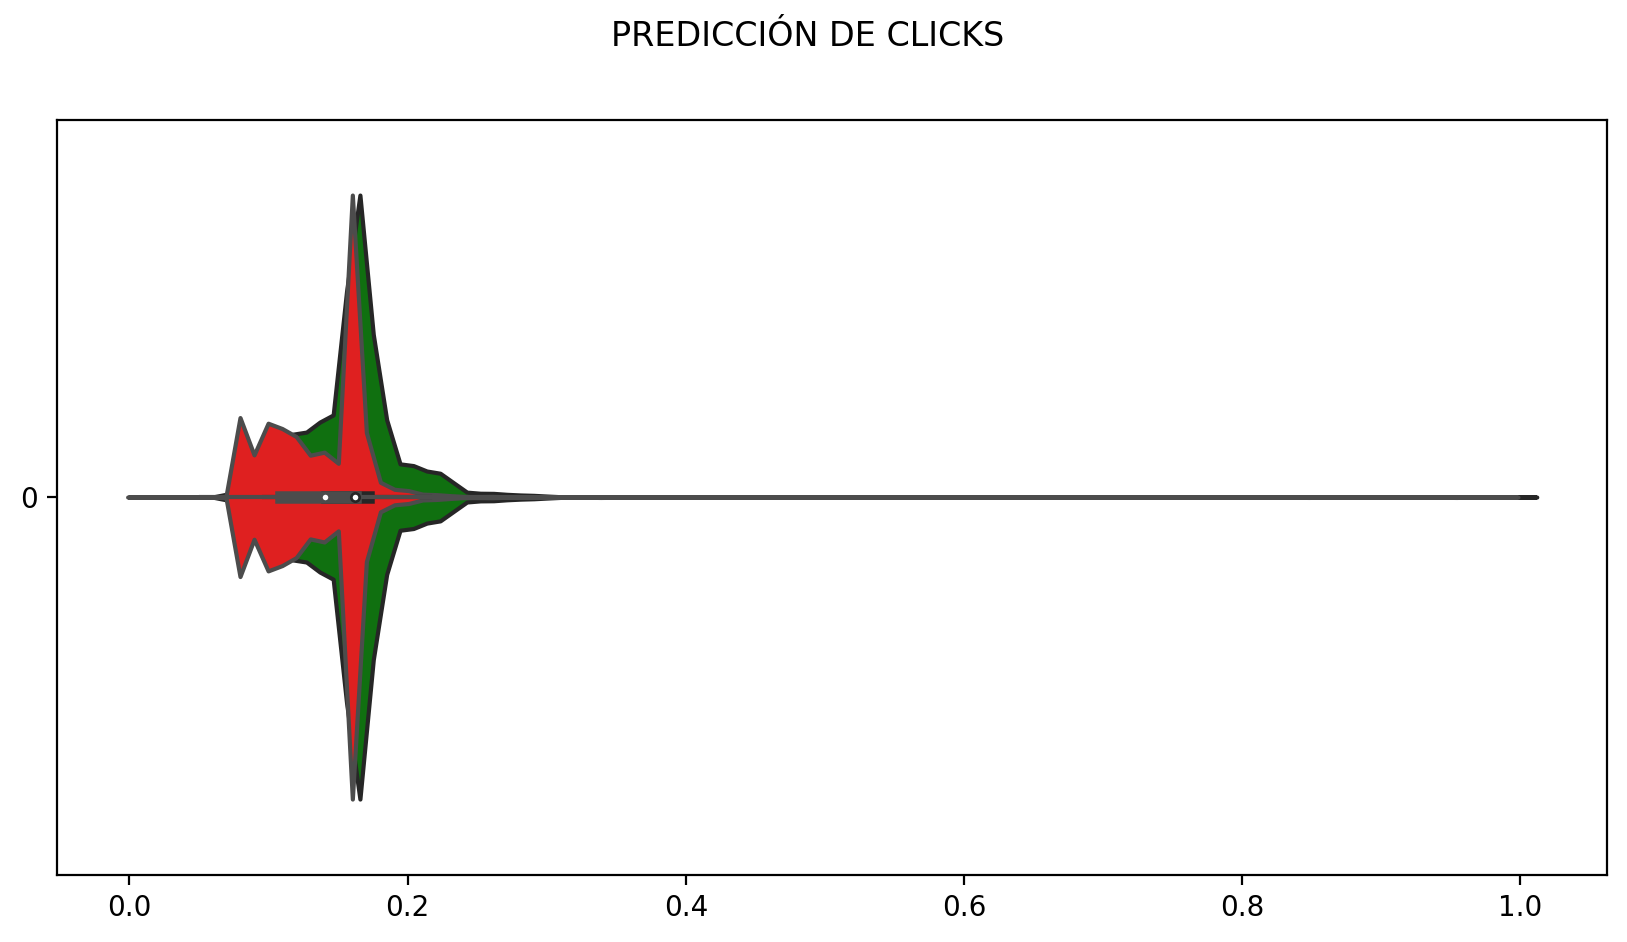

In [42]:
L0_pl = y_test_[y_test==0,1]
L1_pl = y_test_[y_test==1,1]

fig = plt.figure(figsize=(10,5),dpi=200)
fig.suptitle('PREDICCIÓN DE CLICKS')
sns.violinplot(data=L1_pl,vert=True,showmeans=True,color='g',label='Label 1',orient='h')
sns.violinplot(data=L0_pl,vert=True,showmeans=True,color='r',label='Label 0',orient='h')